In [1]:
#Housing Price Prediction- Complete Analysis
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df=pd.read_csv('C:/Users/pramo/OneDrive/Desktop/House_Price_Dataset/train.csv')
test_df=pd.read_csv('C:/Users/pramo/OneDrive/Desktop/House_Price_Dataset/test.csv')
print('Successfully loaded train_df and test_df from local file')
print(f"Train Shape:{train_df.shape}")
print(f"Test Shape:{test_df.shape}")

Successfully loaded train_df and test_df from local file
Train Shape:(1460, 81)
Test Shape:(1459, 80)


In [5]:
#Information of dataset
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Check duplicate rows in dataset
print('\n Duplicate rows in train_df dataset')
print(train_df.duplicated().sum())
print('\n Duplicate rows in test_df dataset')
print(test_df.duplicated().sum())


 Duplicate rows in train_df dataset
0

 Duplicate rows in test_df dataset
0


In [9]:
'''
We need to drop some of the columns which are given below:
1.Utilities: All the categories are same except one and it has missing value alo in test data.
2.MiscFeatures: We have separate column for miscillanious value so we can drop this column.
3.GarageCond, GarageYrBlt, GarageQual, GarageFinish, GarageCars : We delete these features as we only keeps garaze size in squire feet and garaze
  location.
4.ID: We delete it as this is only the identification.
6. Exterior2nd: only keep exterior first.
8.'BsmtExposure': Drop the column 
9. BsmtFinType2': Delete the column
10. 'BsmtFinSF2': Delete this column
11. 'BsmtUnfSF': Drop this two column.

'''
#Delete unnecessary columns in dataset.
# Define the columns to drop from both datasets
columns_to_drop = [
    'MiscFeature',
    'GarageCond',
    'GarageYrBlt',
    'GarageQual',
    'GarageFinish',
    'Utilities',
    'GarageCars',
    'Id',
    'Exterior2nd',
    'BsmtExposure',
    'BsmtFinType2',
    'BsmtFinSF2',
    'BsmtUnfSF'
]

# Drop the columns from the training data
train_df = train_df.drop(columns=columns_to_drop)

# Drop the columns from the test data
# The 'Id' column is already in the list, and 'SalePrice' is not in the test data
test_df = test_df.drop(columns=columns_to_drop)

print("Columns dropped from both training and test data.")
print(f"New shape of training data: {train_df.shape}")
print(f"New shape of test data: {test_df.shape}")

Columns dropped from both training and test data.
New shape of training data: (1460, 68)
New shape of test data: (1459, 67)


In [11]:
#convert MSSubClass and MoSold to object as it is categorical variable.
train_df['MSSubClass']=train_df['MSSubClass'].astype(str)
train_df['MoSold']=train_df['MoSold'].astype(str)

test_df['MSSubClass']=test_df['MSSubClass'].astype(str)
test_df['MoSold']=test_df['MoSold'].astype(str)



In [13]:
#Binary encoding for PoolQC and Alley
train_df['HasPool'] = train_df['PoolQC'].apply(lambda x: 0 if pd.isna(x) else 1)
test_df['HasPool'] = test_df['PoolQC'].apply(lambda x: 0 if pd.isna(x) else 1)

train_df['HasAlley'] = train_df['Alley'].apply(lambda x: 0 if pd.isna(x) else 1)
test_df['HasAlley'] = test_df['Alley'].apply(lambda x: 0 if pd.isna(x) else 1)

In [15]:
#Drop the column poolQC and Alley as we have created bunary column:
train_df = train_df.drop(['PoolQC', 'Alley'], axis=1)
test_df = test_df.drop(['PoolQC', 'Alley'], axis=1)

In [17]:
'''
Missing values imputation strategies:
1.Imputation with Mode:
'KitchenQual', : Impute with mode value
'Functional': Impute with median value
 'Electrical': Impute with median value. 
 'MSZoning': Impute with median
 'Exterior1st', Impute with mmode
2. Imputation with median:
'BsmtFullBath': Impute with median, 
'BsmtHalfBath': Impute with median
3. Imputation with mean:
 'LotFrontage': impute missing values with mean
 'GarageArea': Impute with mean
4. Imputation with 0
 'MasVnrArea':impute with 0
 'BsmtFinSF1': Impute with 0
 'TotalBsmtSF': Impute with 0
5. Imputation with 'None':
 'MasVnrType': Impute with None.
'BsmtQual':Impute missing value with None.
'BsmtCond', : Impute missing value with None.
 'BsmtFinType1': Impute the missing value with None.
 'FireplaceQu': Impute missing value with None.
 'GarageType',: Impute missing with None
'Fence': Impute missing value with None/ 
6. Impute with other:
 'SaleType': impute this with Other

Note: LotFrontage: First impute with mean and next delete column and check the improvement in R and MAE than decide.)
'''
mode_impute_cols = ['KitchenQual', 'Functional', 'Electrical', 'MSZoning', 'Exterior1st']

for col in mode_impute_cols:
    mode_val = train_df[col].mode()[0]
    train_df[col].fillna(mode_val, inplace=True)
    test_df[col].fillna(mode_val, inplace=True)

median_impute_cols = ['BsmtFullBath', 'BsmtHalfBath']

for col in median_impute_cols:
    median_val = train_df[col].median()
    train_df[col].fillna(median_val, inplace=True)
    test_df[col].fillna(median_val, inplace=True)

mean_impute_cols = ['LotFrontage', 'GarageArea']

for col in mean_impute_cols:
    mean_val = train_df[col].mean()
    train_df[col].fillna(mean_val, inplace=True)
    test_df[col].fillna(mean_val, inplace=True)

zero_impute_cols = ['MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF']

for col in zero_impute_cols:
    train_df[col].fillna(0, inplace=True)
    test_df[col].fillna(0, inplace=True)

none_impute_cols = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
                    'FireplaceQu', 'GarageType', 'Fence']

for col in none_impute_cols:
    train_df[col].fillna('None', inplace=True)
    test_df[col].fillna('None', inplace=True)

train_df['SaleType'].fillna('Other', inplace=True)
test_df['SaleType'].fillna('Other', inplace=True)


C:\Users\pramo\AppData\Local\Temp\ipykernel_16388\1500240709.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(mode_val, inplace=True)
C:\Users\pramo\AppData\Local\Temp\ipykernel_16388\1500240709.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [19]:
#Create new column House Age from year sold and built or midified data.
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearRemodAdd']

#Now delete the other column form data set related to house data
train_df.drop(columns=['YrSold', 'YearRemodAdd', 'YearBuilt'], inplace=True)
test_df.drop(columns=['YrSold', 'YearRemodAdd', 'YearBuilt'], inplace=True)


In [21]:
#Log transform the rightly skewed target variables (sale price)
#train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
train_df['SalePrice']=np.log1p(train_df['SalePrice'])

In [23]:
# Separate features by data type

categorical_cols=train_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols=train_df.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'PavedDrive', 'Fence', 'MoSold', 'SaleType', 'SaleCondition']

Numerical Columns:
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'HasPool', 'HasAlley', 'HouseAge']


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
# 2. Apply one-hot encoding to categorical columns
train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# 3. Align test set columns with train set
train_cols = train_df_encoded.columns
test_df_encoded = test_df_encoded.reindex(columns=train_cols, fill_value=0)

In [29]:
#preparing data
X = train_df_encoded.drop(columns=['SalePrice'])
y = train_df_encoded['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
#Make prediction
y_pred = rf_model.predict(X_val)

In [35]:
#evaluate performance
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.10
RMSE: 0.15
R² Score: 0.8845


C:\Users\pramo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
# Reverse the log1p transformation
y_val_original = np.expm1(y_val)
y_pred_original = np.expm1(y_pred)

# Recalculate MAE and RMSE in original scale
mae_original = mean_absolute_error(y_val_original, y_pred_original)
rmse_original = mean_squared_error(y_val_original, y_pred_original, squared=False)

print(f"MAE (original scale): {mae_original:.2f}")
print(f"RMSE (original scale): {rmse_original:.2f}")

MAE (original scale): 17774.03
RMSE (original scale): 29330.31


C:\Users\pramo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


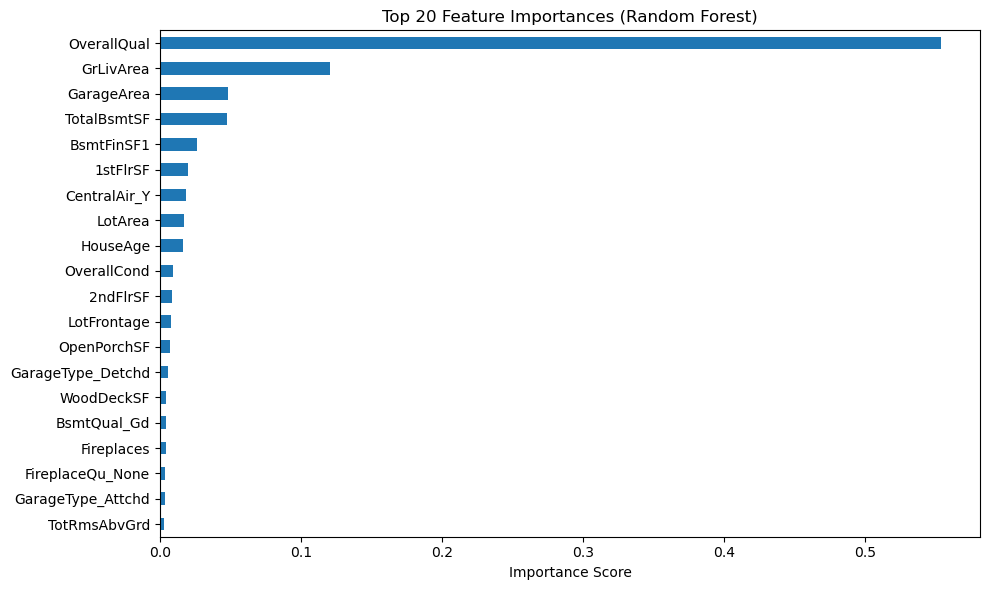

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()